# Reliance Industries
### Stock Analysis and Forecasting

## Business Objective

Predict the Reliance Industries Stock Price for the next 30 days.

There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2015 to 2022 for Reliance Industries stock.

- Split the last year into a test set- to build a model to predict stock price.

- Find short term, & long term trends.

- Understand how it is impacted from external factors or any big external events.

- Forecast for next 30 days.

## Collection of Dataset

- For this project, we will be using the Yfinance library to get the data, which makes it easy to process.

- We collected data from 1-Jan-2015 to 28-Feb-2023.

- But also you can download data from ‘Yahoo! Finance’ website. You can use Below link. 

- https://finance.yahoo.com/quote/RELIANCE.NS/history?p=RELIANCE.NS

## About the data

- Date: Date of trade

- Open: Opening Price of Stock

- High: Highest price of stock on that day

- Low: Lowest price of stock on that day

- Close: Close price adjusted for splits.

- Adj  Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

- Volume: Volume of stock on that day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
data=yf.download('RELIANCE.NS', start='2015-1-1', end='2023-2-28').reset_index(drop=False)
reliance_0 = pd.DataFrame(data)

[*********************100%%**********************]  1 of 1 completed


In [3]:
reliance_0.head(10)

Date        Open        High         Low       Close   Adj Close  \
0 2015-01-01  405.186554  407.792389  403.975037  405.917999  382.812103   
1 2015-01-02  406.009430  409.643921  404.272217  404.843658  381.798981   
2 2015-01-05  404.592224  407.289520  399.609100  400.409149  377.616852   
3 2015-01-06  397.734741  399.106232  380.362396  382.236786  360.478912   
4 2015-01-07  382.693970  392.614471  382.648254  390.557220  368.325806   
5 2015-01-08  393.208771  394.488861  384.088318  384.956940  363.044250   
6 2015-01-09  387.859924  394.077393  386.305573  393.300232  370.912659   
7 2015-01-12  393.391663  393.620239  384.751221  388.728546  366.601196   
8 2015-01-13  389.962891  390.854370  384.248322  385.459808  363.518524   
9 2015-01-14  385.391235  387.219910  379.996674  381.711060  359.983185   

     Volume  
0   1481821  
1   3665683  
2   5051970  
3   9313990  
4  10360156  
5   9936113  
6   6696393  
7   5050056  
8   4974355  
9   5690020

In [4]:
reliance_0.tail(10)

Date         Open         High          Low        Close  \
2006 2023-02-14  2150.543213  2198.492920  2144.728271  2194.985596   
2007 2023-02-15  2193.047119  2249.534912  2190.278320  2244.688965   
2008 2023-02-16  2260.841553  2274.086670  2238.320312  2242.935303   
2009 2023-02-17  2233.659180  2259.041748  2224.982910  2252.303711   
2010 2023-02-20  2256.734131  2261.118408  2224.521484  2228.490479   
2011 2023-02-21  2237.351318  2258.395508  2226.598145  2246.673584   
2012 2023-02-22  2239.151123  2242.889160  2192.170410  2195.723877   
2013 2023-02-23  2194.893311  2210.353516  2179.525391  2185.201660   
2014 2023-02-24  2189.355225  2211.645752  2185.663330  2200.154297   
2015 2023-02-27  2198.585205  2205.646240  2170.618408  2185.524658   

        Adj Close    Volume  
2006  2187.259277   7160960  
2007  2236.787598  16751795  
2008  2235.040039   8632243  
2009  2244.375488   5904760  
2010  2220.646240   4418468  
2011  2238.765381   6655796  
2012  2187.994873   5512167  
2013  2177.509766   4925955  
2014  2192.409668   4717026  
2015  2177.831543   5599857

# EDA

Analysis is only based on Open, High, Low, close price and volume

There is no need of Adj Close

In [5]:
# Removing "Adj Close" columnfrom dataset
reliance_1=reliance_0.drop(["Adj Close"],axis=1).reset_index(drop=True)
reliance_1

Date         Open         High          Low        Close    Volume
0    2015-01-01   405.186554   407.792389   403.975037   405.917999   1481821
1    2015-01-02   406.009430   409.643921   404.272217   404.843658   3665683
2    2015-01-05   404.592224   407.289520   399.609100   400.409149   5051970
3    2015-01-06   397.734741   399.106232   380.362396   382.236786   9313990
4    2015-01-07   382.693970   392.614471   382.648254   390.557220  10360156
...         ...          ...          ...          ...          ...       ...
2011 2023-02-21  2237.351318  2258.395508  2226.598145  2246.673584   6655796
2012 2023-02-22  2239.151123  2242.889160  2192.170410  2195.723877   5512167
2013 2023-02-23  2194.893311  2210.353516  2179.525391  2185.201660   4925955
2014 2023-02-24  2189.355225  2211.645752  2185.663330  2200.154297   4717026
2015 2023-02-27  2198.585205  2205.646240  2170.618408  2185.524658   5599857

[2016 rows x 6 columns]

In [6]:
# Finding duplicate columns, if any
reliance_1[reliance_1.duplicated()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [7]:
# Finding null values, if any
reliance_1.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
#To check which rows have any missing value under any column
reliance_1[reliance_1.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [9]:
# Removing the row which have null value
reliance_2=reliance_1.dropna().reset_index(drop=True)
reliance_2

Date         Open         High          Low        Close    Volume
0    2015-01-01   405.186554   407.792389   403.975037   405.917999   1481821
1    2015-01-02   406.009430   409.643921   404.272217   404.843658   3665683
2    2015-01-05   404.592224   407.289520   399.609100   400.409149   5051970
3    2015-01-06   397.734741   399.106232   380.362396   382.236786   9313990
4    2015-01-07   382.693970   392.614471   382.648254   390.557220  10360156
...         ...          ...          ...          ...          ...       ...
2011 2023-02-21  2237.351318  2258.395508  2226.598145  2246.673584   6655796
2012 2023-02-22  2239.151123  2242.889160  2192.170410  2195.723877   5512167
2013 2023-02-23  2194.893311  2210.353516  2179.525391  2185.201660   4925955
2014 2023-02-24  2189.355225  2211.645752  2185.663330  2200.154297   4717026
2015 2023-02-27  2198.585205  2205.646240  2170.618408  2185.524658   5599857

[2016 rows x 6 columns]

In [10]:
# Checking wether if there exist any null values
reliance_2[reliance_2.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [11]:
# Making a copy of dataset as reliance
reliance=reliance_2.copy()
reliance

Date         Open         High          Low        Close    Volume
0    2015-01-01   405.186554   407.792389   403.975037   405.917999   1481821
1    2015-01-02   406.009430   409.643921   404.272217   404.843658   3665683
2    2015-01-05   404.592224   407.289520   399.609100   400.409149   5051970
3    2015-01-06   397.734741   399.106232   380.362396   382.236786   9313990
4    2015-01-07   382.693970   392.614471   382.648254   390.557220  10360156
...         ...          ...          ...          ...          ...       ...
2011 2023-02-21  2237.351318  2258.395508  2226.598145  2246.673584   6655796
2012 2023-02-22  2239.151123  2242.889160  2192.170410  2195.723877   5512167
2013 2023-02-23  2194.893311  2210.353516  2179.525391  2185.201660   4925955
2014 2023-02-24  2189.355225  2211.645752  2185.663330  2200.154297   4717026
2015 2023-02-27  2198.585205  2205.646240  2170.618408  2185.524658   5599857

[2016 rows x 6 columns]

#### Discriptive Statistics

In [12]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2016 non-null   datetime64[ns]
 1   Open    2016 non-null   float64       
 2   High    2016 non-null   float64       
 3   Low     2016 non-null   float64       
 4   Close   2016 non-null   float64       
 5   Volume  2016 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 94.6 KB


In [13]:
reliance.describe()

Date         Open         High          Low  \
count                           2016  2016.000000  2016.000000  2016.000000   
mean   2019-02-02 01:47:08.571428608  1234.888692  1248.750845  1220.262428   
min              2015-01-01 00:00:00   373.322052   373.824921   364.110138   
25%              2017-01-17 18:00:00   494.768295   498.677063   489.402313   
50%              2019-01-30 12:00:00  1104.925354  1121.657654  1090.638916   
75%              2021-02-16 06:00:00  1924.454346  1943.087372  1902.175415   
max              2023-02-27 00:00:00  2636.225586  2636.225586  2571.569336   
std                              NaN   702.244682   709.695343   694.045726   

             Close        Volume  
count  2016.000000  2.016000e+03  
mean   1233.937302  9.792885e+06  
min     370.647614  8.528280e+05  
25%     493.853958  5.667569e+06  
50%    1104.856812  7.711489e+06  
75%    1922.423737  1.106368e+07  
max    2602.720703  7.134168e+07  
std     701.543817  7.200903e+06

In [14]:
reliance.corr()

Date      Open      High       Low     Close    Volume
Date    1.000000  0.966801  0.967177  0.966593  0.966916  0.092894
Open    0.966801  1.000000  0.999745  0.999744  0.999469  0.059469
High    0.967177  0.999745  1.000000  0.999687  0.999803  0.068541
Low     0.966593  0.999744  0.999687  1.000000  0.999777  0.052957
Close   0.966916  0.999469  0.999803  0.999777  1.000000  0.061589
Volume  0.092894  0.059469  0.068541  0.052957  0.061589  1.000000

- Every attributes are highly corelated except volume

In [15]:
# converting the date column in to datetime 
reliance['Date']=pd.to_datetime(reliance['Date'],format='%Y-%m-%d')
reliance

Date         Open         High          Low        Close    Volume
0    2015-01-01   405.186554   407.792389   403.975037   405.917999   1481821
1    2015-01-02   406.009430   409.643921   404.272217   404.843658   3665683
2    2015-01-05   404.592224   407.289520   399.609100   400.409149   5051970
3    2015-01-06   397.734741   399.106232   380.362396   382.236786   9313990
4    2015-01-07   382.693970   392.614471   382.648254   390.557220  10360156
...         ...          ...          ...          ...          ...       ...
2011 2023-02-21  2237.351318  2258.395508  2226.598145  2246.673584   6655796
2012 2023-02-22  2239.151123  2242.889160  2192.170410  2195.723877   5512167
2013 2023-02-23  2194.893311  2210.353516  2179.525391  2185.201660   4925955
2014 2023-02-24  2189.355225  2211.645752  2185.663330  2200.154297   4717026
2015 2023-02-27  2198.585205  2205.646240  2170.618408  2185.524658   5599857

[2016 rows x 6 columns]

In [16]:
# Setting the date column as index
reliance=reliance.set_index('Date')
reliance

Open         High          Low        Close    Volume
Date                                                                    
2015-01-01   405.186554   407.792389   403.975037   405.917999   1481821
2015-01-02   406.009430   409.643921   404.272217   404.843658   3665683
2015-01-05   404.592224   407.289520   399.609100   400.409149   5051970
2015-01-06   397.734741   399.106232   380.362396   382.236786   9313990
2015-01-07   382.693970   392.614471   382.648254   390.557220  10360156
...                 ...          ...          ...          ...       ...
2023-02-21  2237.351318  2258.395508  2226.598145  2246.673584   6655796
2023-02-22  2239.151123  2242.889160  2192.170410  2195.723877   5512167
2023-02-23  2194.893311  2210.353516  2179.525391  2185.201660   4925955
2023-02-24  2189.355225  2211.645752  2185.663330  2200.154297   4717026
2023-02-27  2198.585205  2205.646240  2170.618408  2185.524658   5599857

[2016 rows x 5 columns]

### Visualizations

Text(0.5, 1.0, 'Low')

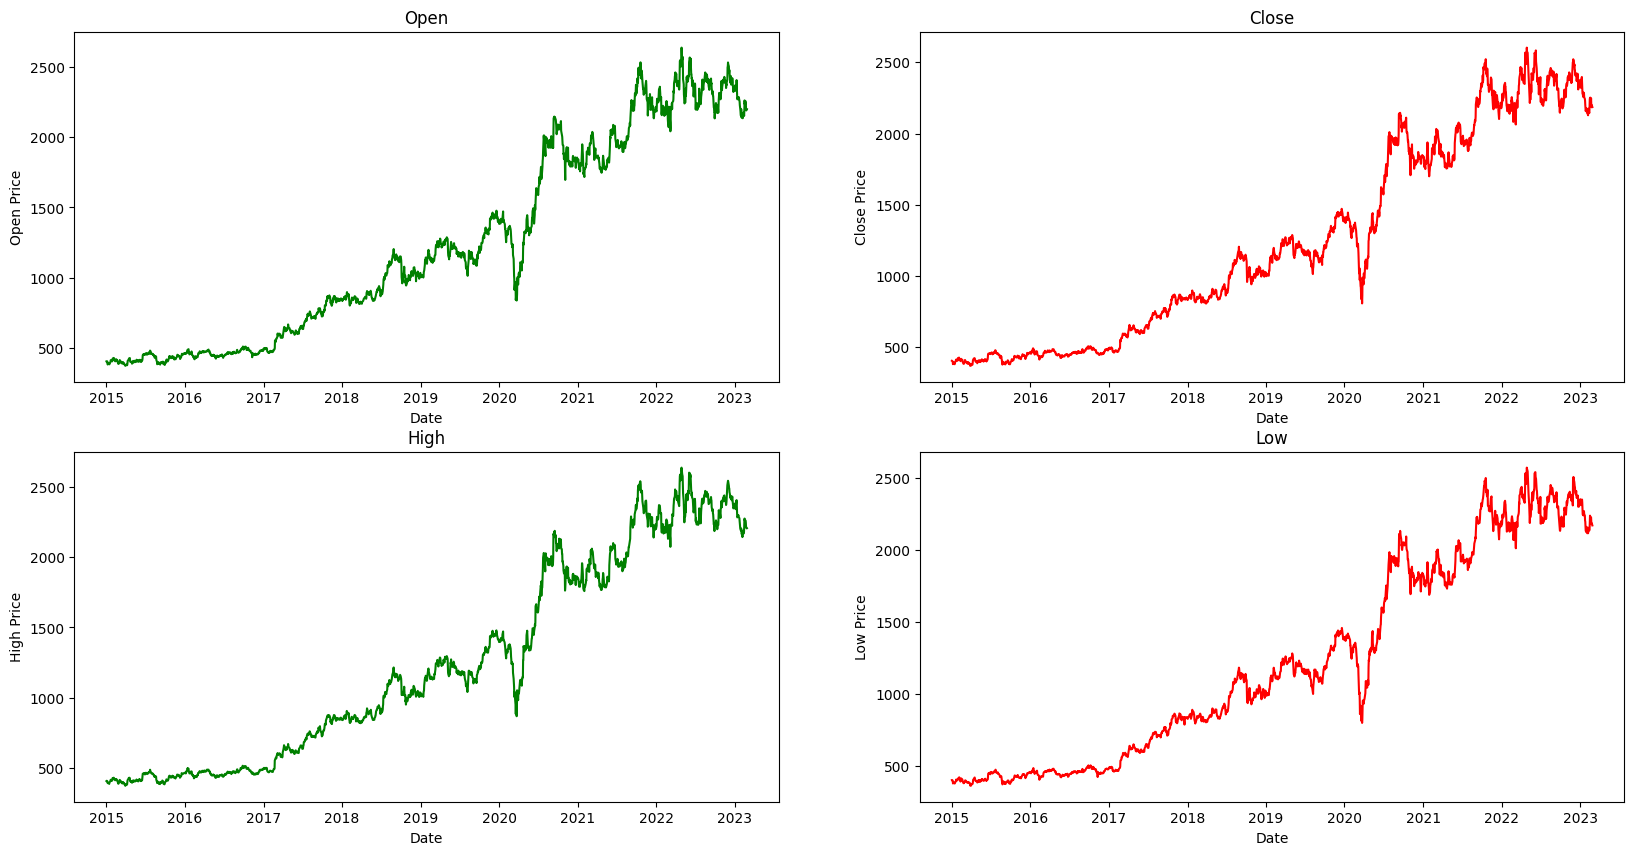

In [17]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(reliance['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(reliance['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(reliance['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(reliance['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

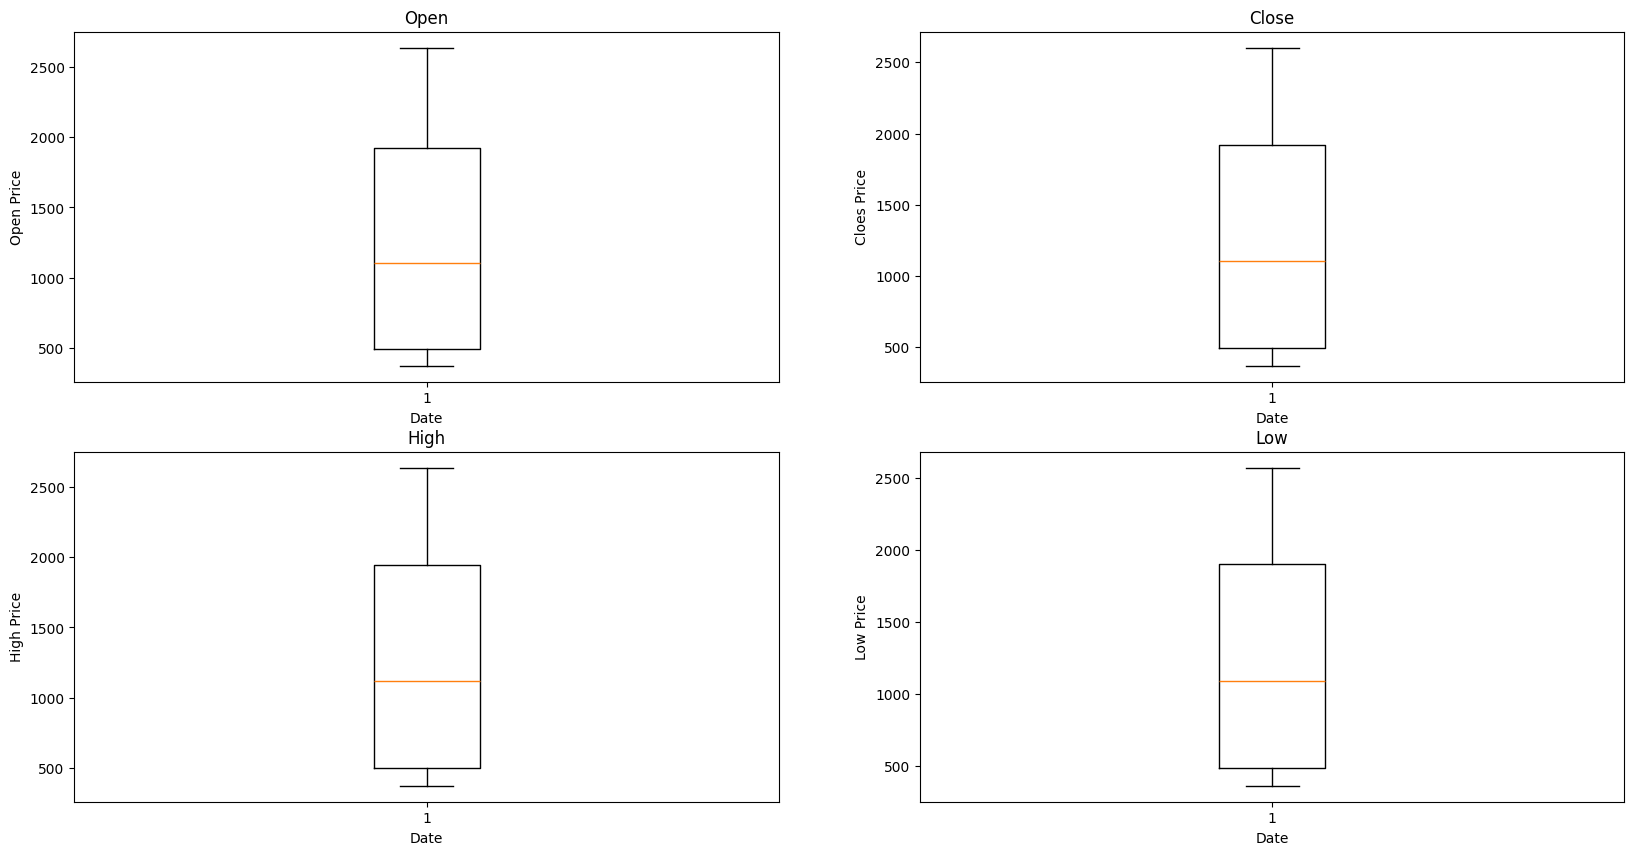

In [18]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(reliance['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(reliance['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(reliance['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(reliance['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

From the box plot it is clear that there are no outliers inthe dataset

Text(0.5, 1.0, 'Low')

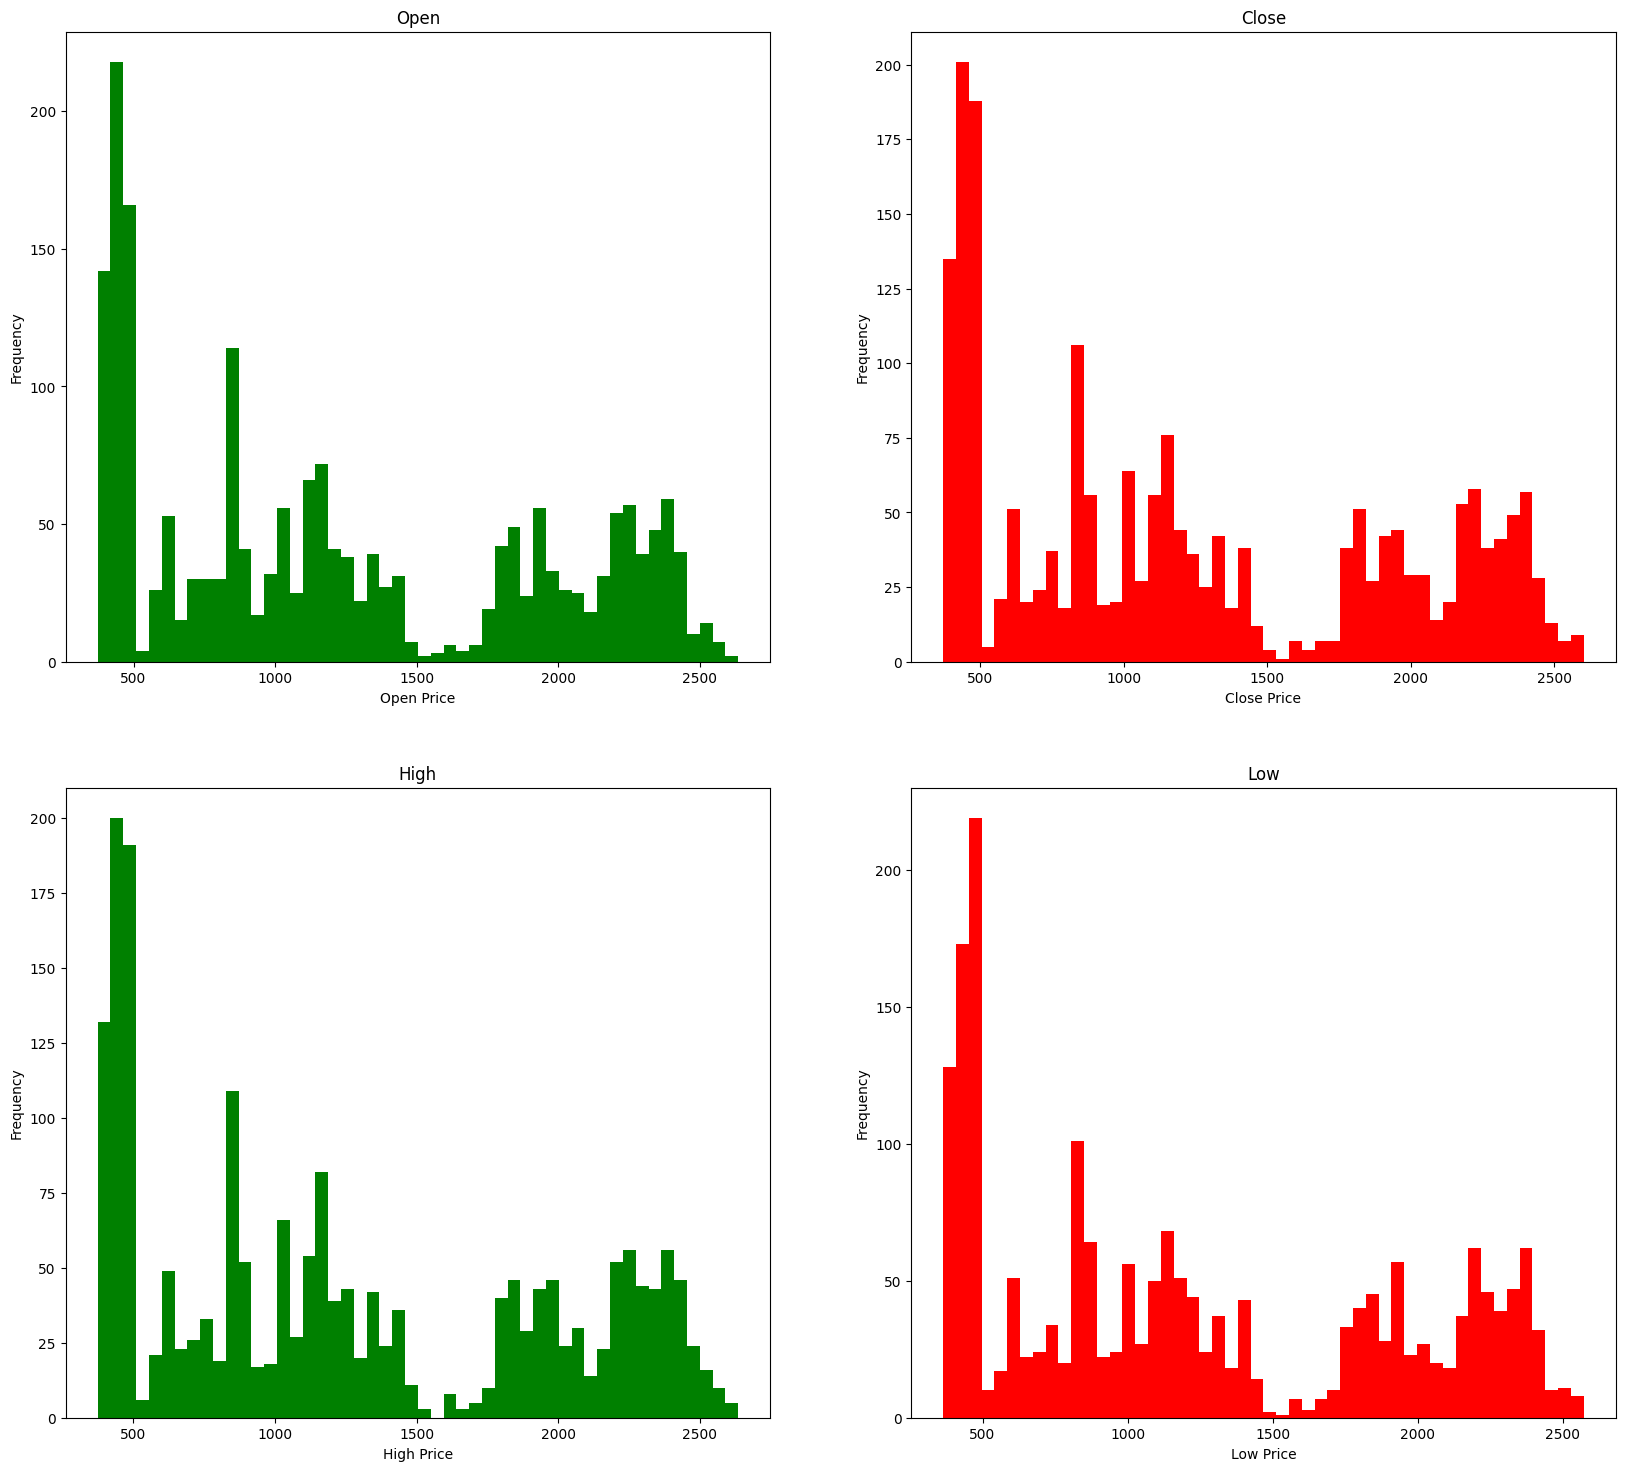

In [19]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(reliance['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(reliance['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(reliance['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(reliance['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

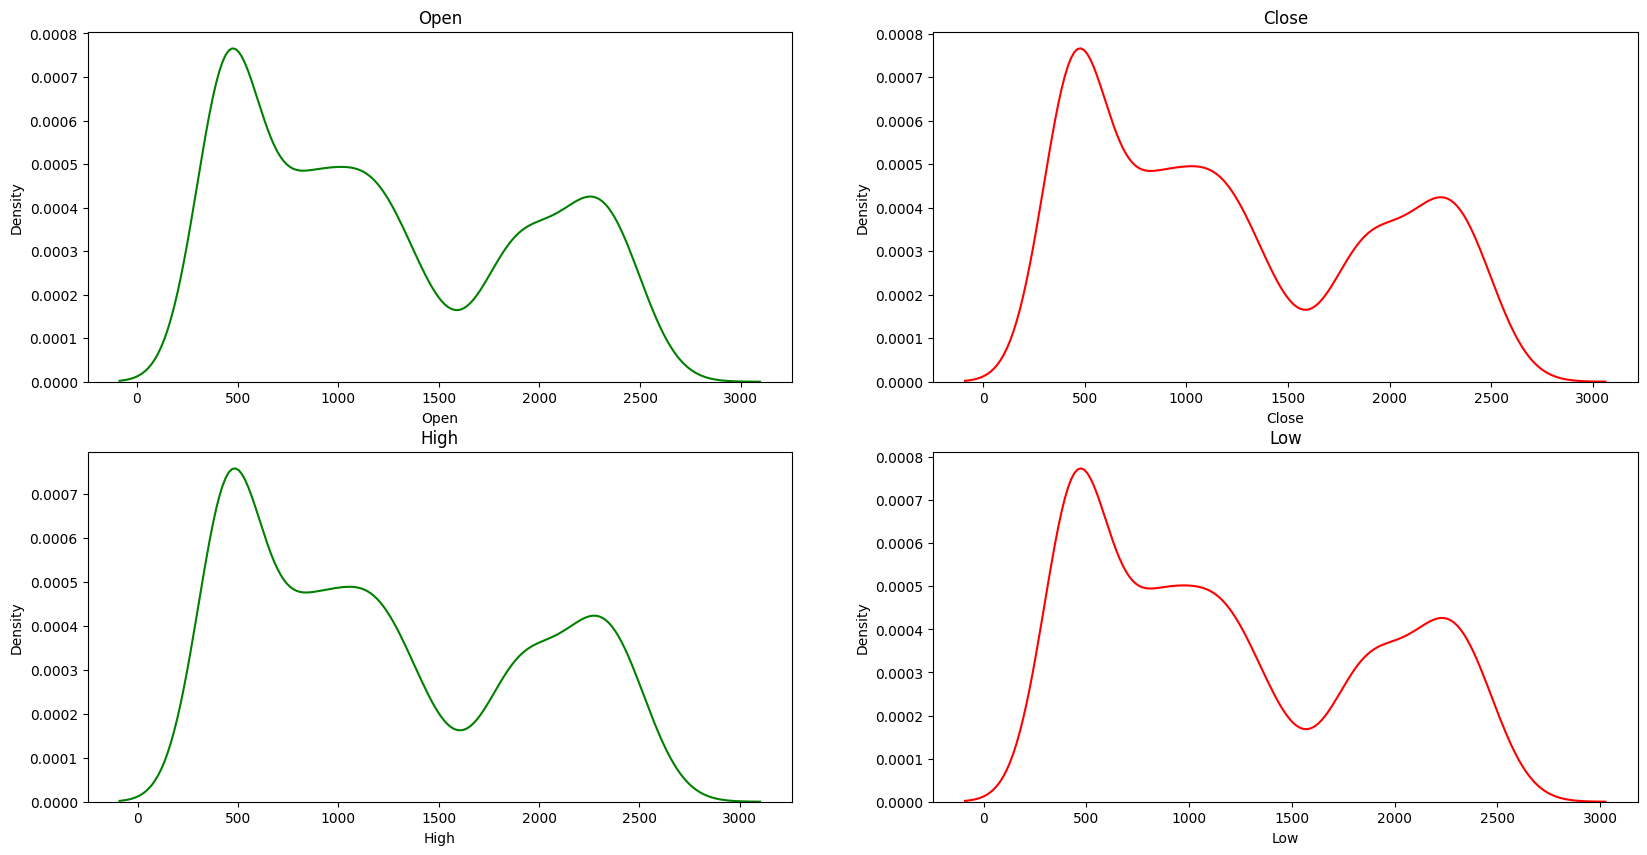

In [20]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(reliance['Open'], color='green')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(reliance['Close'], color='red')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(reliance['High'], color='green')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(reliance['Low'], color='red')
plt.title('Low')

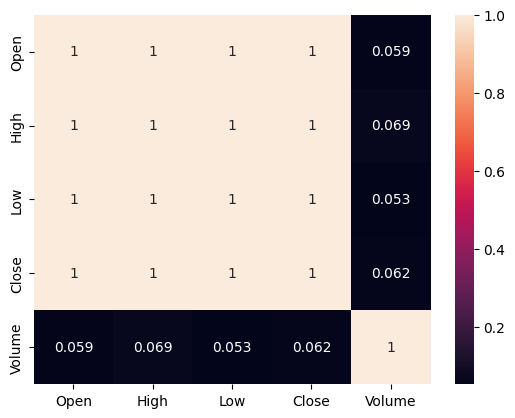

In [21]:
sns.heatmap(reliance.corr(),annot=True)
plt.show()

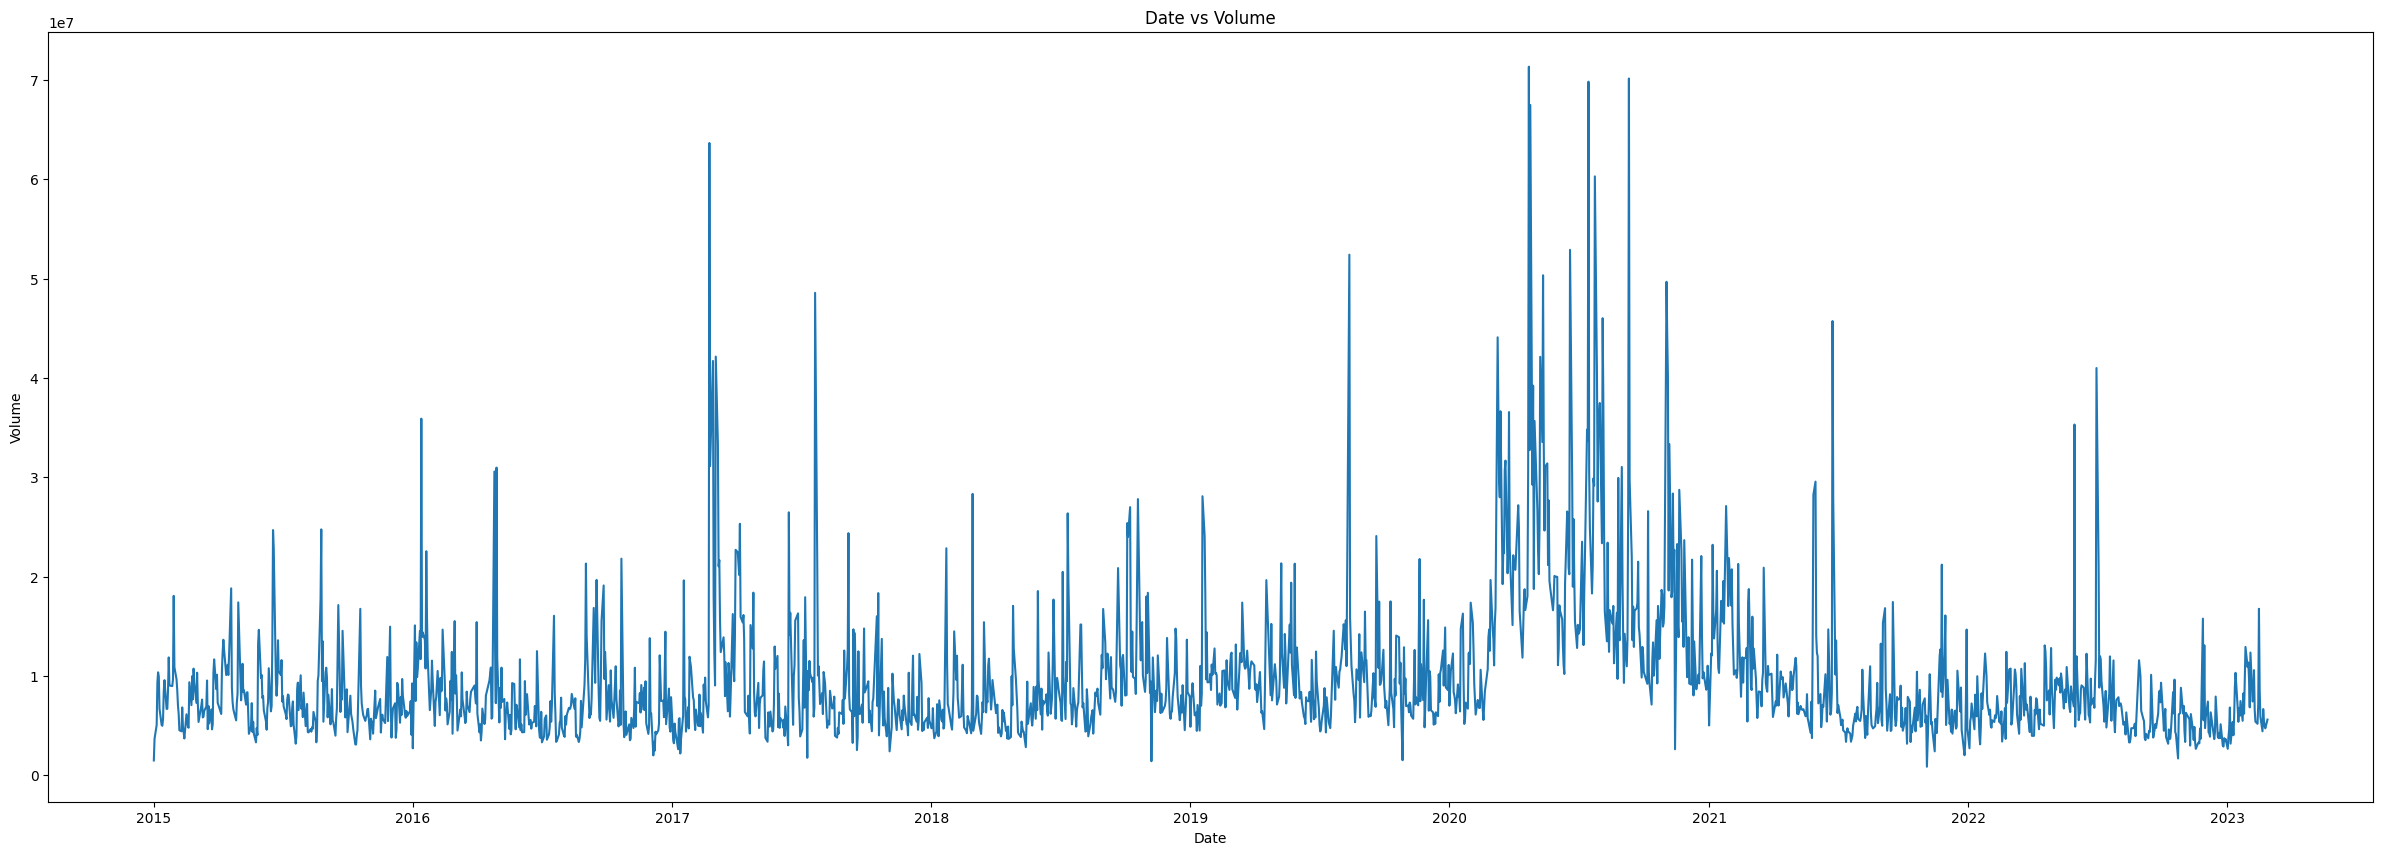

In [22]:
figure=plt.figure(figsize=(30,10))
plt.plot(reliance['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

## Finding long-term and short-term trends

### Moving Average

In [23]:
reliance_ma=reliance.copy()
reliance_ma['30-day MA']=reliance['Close'].rolling(window=30).mean()
reliance_ma['200-day MA']=reliance['Close'].rolling(window=200).mean()

In [24]:
reliance_ma

Open         High          Low        Close    Volume  \
Date                                                                       
2015-01-01   405.186554   407.792389   403.975037   405.917999   1481821   
2015-01-02   406.009430   409.643921   404.272217   404.843658   3665683   
2015-01-05   404.592224   407.289520   399.609100   400.409149   5051970   
2015-01-06   397.734741   399.106232   380.362396   382.236786   9313990   
2015-01-07   382.693970   392.614471   382.648254   390.557220  10360156   
...                 ...          ...          ...          ...       ...   
2023-02-21  2237.351318  2258.395508  2226.598145  2246.673584   6655796   
2023-02-22  2239.151123  2242.889160  2192.170410  2195.723877   5512167   
2023-02-23  2194.893311  2210.353516  2179.525391  2185.201660   4925955   
2023-02-24  2189.355225  2211.645752  2185.663330  2200.154297   4717026   
2023-02-27  2198.585205  2205.646240  2170.618408  2185.524658   5599857   

              30-day MA   200-day MA  
Date                                  
2015-01-01          NaN          NaN  
2015-01-02          NaN          NaN  
2015-01-05          NaN          NaN  
2015-01-06          NaN          NaN  
2015-01-07          NaN          NaN  
...                 ...          ...  
2023-02-21  2219.069678  2330.573254  
2023-02-22  2213.547062  2329.929923  
2023-02-23  2208.665926  2329.435426  
2023-02-24  2205.961540  2329.132682  
2023-02-27  2202.892562  2328.987078  

[2016 rows x 7 columns]

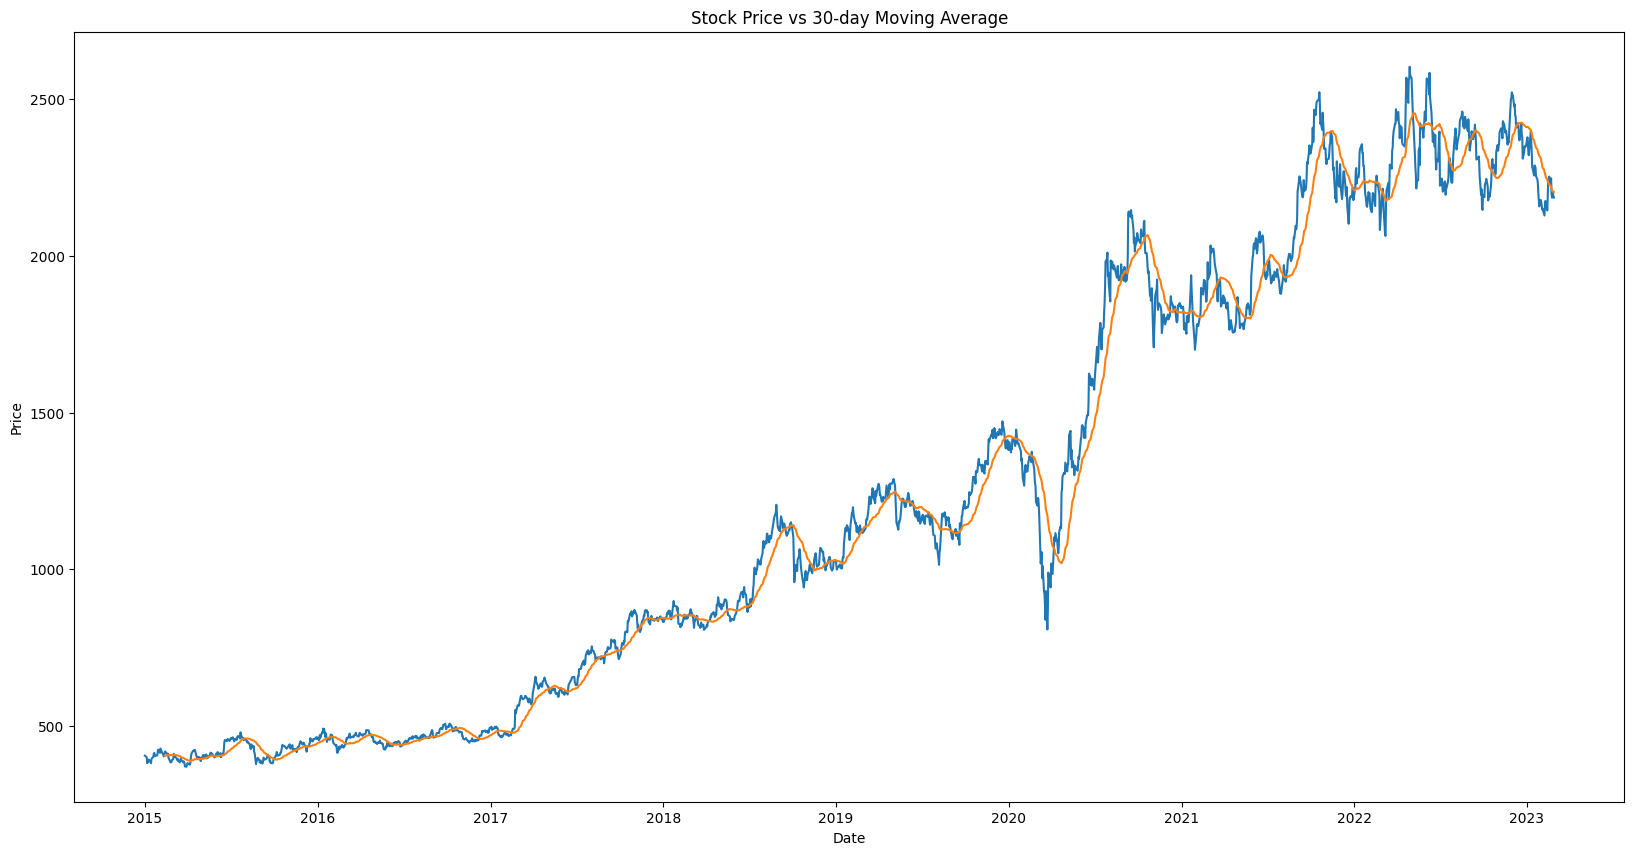

In [25]:
plt.figure(figsize=(20,10))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

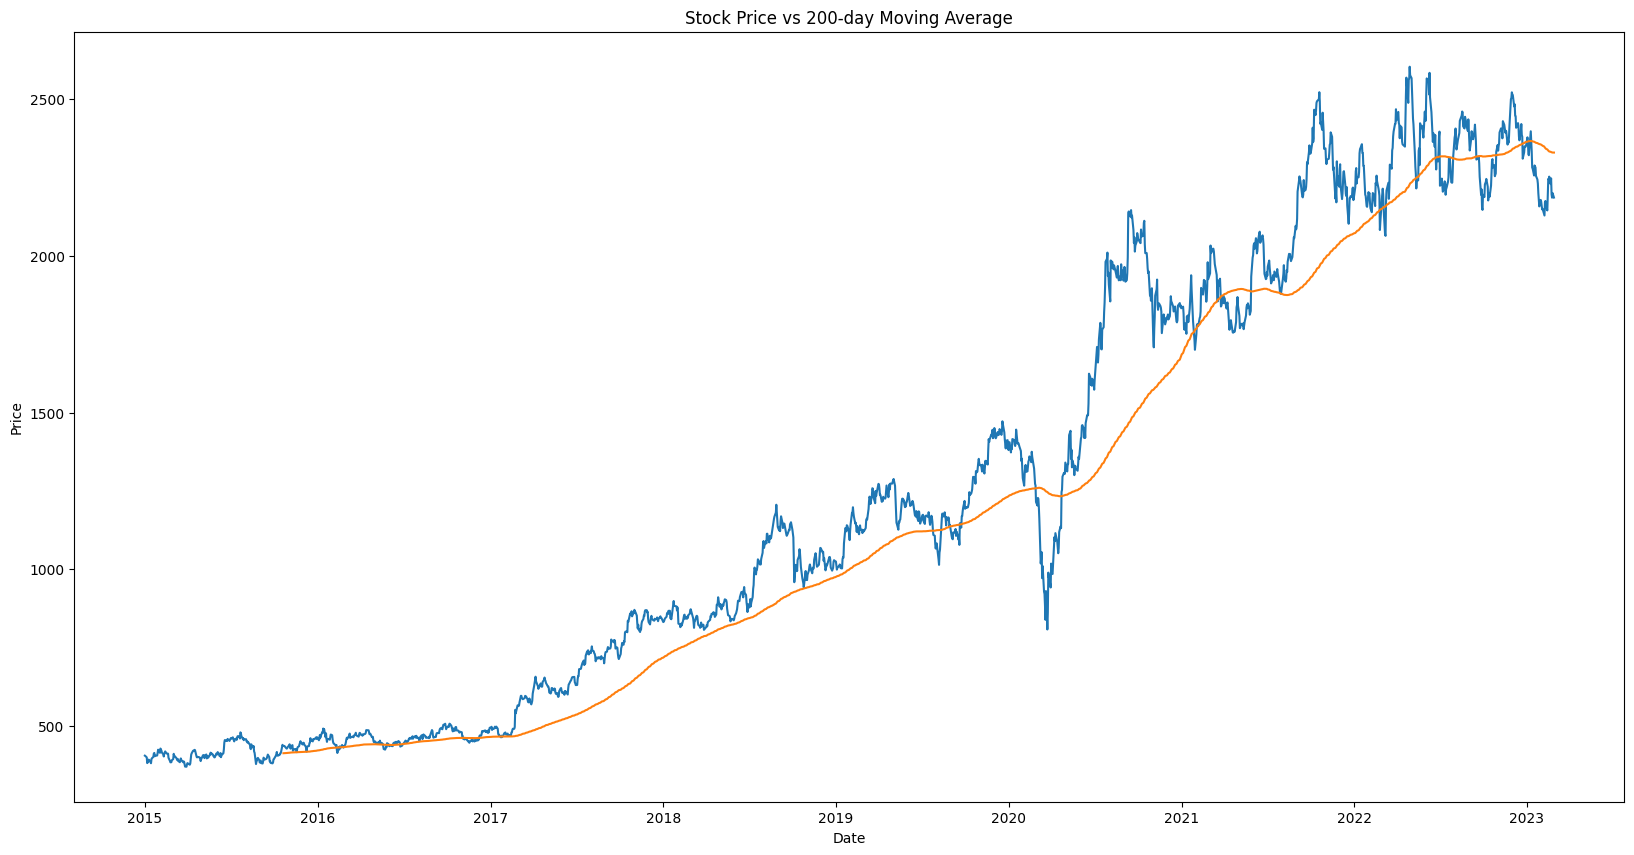

In [26]:
plt.figure(figsize=(20,10))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['200-day MA'],label='200-MA')
plt.legend
plt.title('Stock Price vs 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Long term and short term trends can be identified using the Moving Average graphs
- In long term, Stock price is in upward trend
- Short term trends can be identified from MA-30 chart
- Stock had a major short term downtrend during the year 2020
- It may be due to the bearish market during the Covid-19 outbraek

## Model Building

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px

In [28]:
reliance

Open         High          Low        Close    Volume
Date                                                                    
2015-01-01   405.186554   407.792389   403.975037   405.917999   1481821
2015-01-02   406.009430   409.643921   404.272217   404.843658   3665683
2015-01-05   404.592224   407.289520   399.609100   400.409149   5051970
2015-01-06   397.734741   399.106232   380.362396   382.236786   9313990
2015-01-07   382.693970   392.614471   382.648254   390.557220  10360156
...                 ...          ...          ...          ...       ...
2023-02-21  2237.351318  2258.395508  2226.598145  2246.673584   6655796
2023-02-22  2239.151123  2242.889160  2192.170410  2195.723877   5512167
2023-02-23  2194.893311  2210.353516  2179.525391  2185.201660   4925955
2023-02-24  2189.355225  2211.645752  2185.663330  2200.154297   4717026
2023-02-27  2198.585205  2205.646240  2170.618408  2185.524658   5599857

[2016 rows x 5 columns]

In [29]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(reliance['Close'])
close_df

Close
Date                   
2015-01-01   405.917999
2015-01-02   404.843658
2015-01-05   400.409149
2015-01-06   382.236786
2015-01-07   390.557220
...                 ...
2023-02-21  2246.673584
2023-02-22  2195.723877
2023-02-23  2185.201660
2023-02-24  2200.154297
2023-02-27  2185.524658

[2016 rows x 1 columns]

In [30]:
print(close_df.shape)

(2016, 1)


In [31]:
close_df=close_df.reset_index()

In [32]:
close_df['Date']

0      2015-01-01
1      2015-01-02
2      2015-01-05
3      2015-01-06
4      2015-01-07
          ...    
2011   2023-02-21
2012   2023-02-22
2013   2023-02-23
2014   2023-02-24
2015   2023-02-27
Name: Date, Length: 2016, dtype: datetime64[ns]

### Normalizing / scaling close value between 0 to 1

In [33]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(2016, 1)


### Split data for training and testing
- Ratio for training and testing data is 86:14

In [34]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1733, 1)
test_data:  (283, 1)


### Create new dataset according to requirement of time-series prediction

In [35]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1719, 13)
y_train:  (1719,)
X_test:  (269, 13)
y_test (269,)


## Algorithms

## Support vector regression - SVR

In [37]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [38]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [39]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [40]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))


Train data RMSE:  49.709699144611264
Train data MSE:  2471.0541890477657
Test data MAE:  36.33520098740601
-------------------------------------------------------------------------------------
Test data RMSE:  80.82837716438986
Test data MSE:  6533.226555028861
Test data MAE:  64.68347615939382


### Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [41]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9928377375313263
Test data explained variance regression score: 0.5781743088000127


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [42]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.9928173770957893
Test data R2 score: 0.49266436411333925


### Comparision between original stock close price vs predicted close price

In [43]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'], 'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],plotdf['test_predicted_close']],labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [44]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [45]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [46]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [47]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Random Forest Regressor - RF

In [48]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [49]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [50]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [51]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  9.20583620798691
Train data MSE:  84.74742028828281
Test data MAE:  5.858736688548438
-------------------------------------------------------------------------------------
Test data RMSE:  45.314140007989536
Test data MSE:  2053.371284663678
Test data MAE:  33.728896402692264


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [52]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9997537288842832
Test data explained variance regression score: 0.8424872138387018


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [53]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9997536643410195
Test data R2 score: 0.8405461041888429


### Comparision between original stock close price vs predicted close price

In [54]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [55]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [56]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [57]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [58]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### K-nearest neighgbour - KNN

In [59]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [60]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [61]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [62]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  28.862105034994528
Train data MSE:  833.0211070510564
Test data MAE:  18.38741471247102
-------------------------------------------------------------------------------------
Test data RMSE:  57.151927319298366
Test data MSE:  3266.3427963103627
Test data MAE:  43.81625922107338


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [63]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.997580213775407
Test data explained variance regression score: 0.7471092711548378


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [64]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9975786542805435
Test data R2 score: 0.7463531861887789


### Comparision between original stock close price vs predicted close price

In [65]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [66]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [67]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [68]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### Plotting whole closing stock price with prediction

In [69]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### LSTM

In [70]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1719, 13, 1)
X_test:  (269, 13, 1)


### LSTM model structure

In [71]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 13, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 13, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,025 (82.13 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0577 - val_loss: 0.0033
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8239e-04 - val_loss: 0.0017
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7951e-04 - val_loss: 0.0021
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5475e-04 - val_loss: 0.0017
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8343e-04 - val_loss: 0.0016
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3306e-04 - val_loss: 0.0020
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.2265e-04 - val_loss: 0.0015
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.6473e-04 - val_loss: 0.0039
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.1856e-04 - val_loss: 0.0018
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0806e-04 - val_loss: 0.0015
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3657e-04 - val_loss: 0.0015
Epoch 12/100
54/54 ━━━

In [74]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


((1719, 1), (269, 1))

In [75]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [76]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  24.749970247484725
Train data MSE:  612.5610272513792
Test data MAE:  16.929960098843587
-------------------------------------------------------------------------------------
Test data RMSE:  41.412183593281014
Test data MSE:  1714.9689499636133
Test data MAE:  31.13085755982808


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [77]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9982196219703747
Test data explained variance regression score: 0.8891546086097731


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [78]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9982194664592693
Test data R2 score: 0.8668246301536952


### Comparision between original stock close price vs predicted close price

In [79]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [80]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [81]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [82]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [83]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### GRU (Gated Recurrent Unit)

In [84]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1719, 13, 1)
X_test:  (269, 13, 1)


In [85]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [86]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 13, 32)         │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 13, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 13, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,401 (87.50 KB)

 Trainable params: 22,401 (87.50 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0416 - val_loss: 0.0050
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.5767e-04 - val_loss: 0.0011
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2068e-04 - val_loss: 0.0020
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.2900e-04 - val_loss: 0.0011
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2429e-04 - val_loss: 9.8521e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0933e-04 - val_loss: 0.0015
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8278e-04 - val_loss: 0.0013
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9416e-04 - val_loss: 9.1636e-04
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.9788e-04 - val_loss: 9.1999e-04
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.6168e-04 - val_loss: 8.9686e-04
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2282e-04 - val_loss: 7.3

In [88]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


((1719, 1), (269, 1))

In [89]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [90]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  39.95728998862815
Train data MSE:  1596.5850232353232
Test data MAE:  29.755979350446776
-------------------------------------------------------------------------------------
Test data RMSE:  78.70202202089139
Test data MSE:  6194.008270176872
Test data MAE:  70.90400236335388


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [91]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9976614870676589
Test data explained variance regression score: 0.8922917039681163


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [92]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.9953592000502308
Test data R2 score: 0.5190062524284316


### Comparision between original stock close price vs predicted close price

In [93]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


In [94]:
plotdf.head(100)

Date  original_close  train_predicted_close  test_predicted_close
0  2015-01-01      405.917999                    NaN                   NaN
1  2015-01-02      404.843658                    NaN                   NaN
2  2015-01-05      400.409149                    NaN                   NaN
3  2015-01-06      382.236786                    NaN                   NaN
4  2015-01-07      390.557220                    NaN                   NaN
..        ...             ...                    ...                   ...
95 2015-05-25      408.935303             405.120514                   NaN
96 2015-05-26      404.409363             403.615417                   NaN
97 2015-05-27      404.729370             400.328949                   NaN
98 2015-05-28      400.386292             398.806793                   NaN
99 2015-05-29      400.934906             396.285095                   NaN

[100 rows x 4 columns]

### Predicting next 30 days

In [95]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [96]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [97]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [98]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [99]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

svr           rf          knn         lstm          gru
0      405.917999   405.917999   405.917999   405.917999   405.917999
1      404.843658   404.843658   404.843658   404.843658   404.843658
2      400.409149   400.409149   400.409149   400.409149   400.409149
3      382.236786   382.236786   382.236786   382.236786   382.236786
4      390.557220   390.557220   390.557220   390.557220   390.557220
...           ...          ...          ...          ...          ...
2041  2086.667273  2209.216812  2225.252836  2004.993009  1073.006728
2042  2082.985919  2210.814978  2222.529992  1999.635277  1048.747264
2043  2079.314982  2213.004785  2229.193341  1994.354976  1025.346521
2044  2075.654902  2212.621748  2232.647498  1989.150376  1002.764184
2045  2072.011386  2213.238779  2241.873948  1984.019615   980.962271

[2046 rows x 5 columns]

### Conclusion Chart

In [100]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:], 
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [101]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

Model  Train R2 Score  Test R2 Score
0            SVR        0.992817       0.492664
1  Random Forest        0.999754       0.840546
2            KNN        0.997579       0.746353
3           LSTM        0.998219       0.866825
4            GRU        0.995359       0.519006

#### By Looking into this table we can say that our LSTM model have best R2 scores in Training and Testing. So we are going to use LSTM model for our deployment part.

## 